In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_widths
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import copy
import math
from scipy.stats import t 

In [52]:
# Пути для данных и сохранения результатов
data_path =  "relax.txt"
save_path = "relax.txt"

In [3]:
def unpack(path): 
    file = open(path, 'r' )
    data = file.readlines()
    data = [line.rstrip().split(",") for line in data]
    settings = data[:4]
    del data[:5]
    data = np.array(data).astype("float")
    return  settings, data



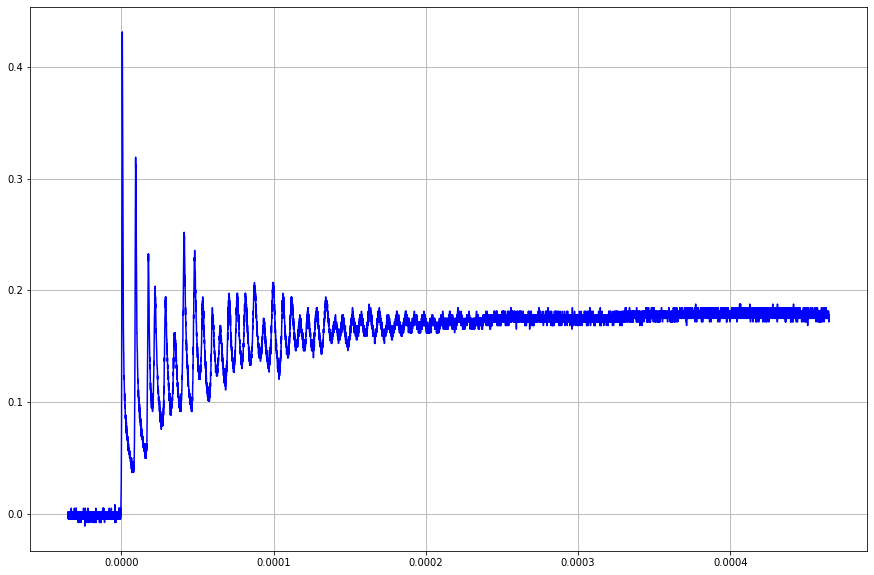

In [53]:
sett, data_0 = unpack(data_path)
time = [i[0] for i in data_0]
ampl = [i[1] for i in data_0]
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(time, ampl, c = 'blue') 
ax.grid()

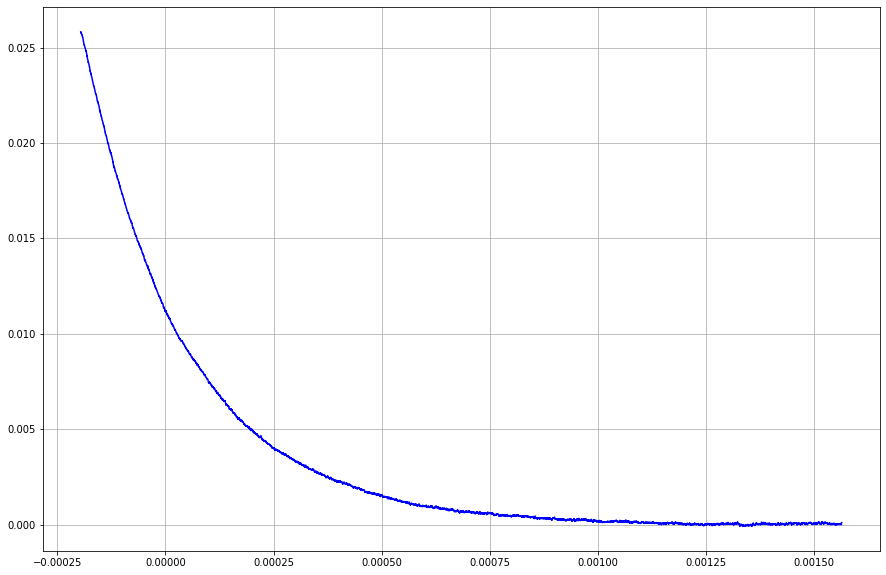

In [27]:
ampl_filter = savgol_filter(ampl, 99, 3)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(time[6000:], ampl_filter[6000:], c = 'blue') 
ax.grid()

In [28]:
def func(x, b):
    return np.exp(-b * x)

In [50]:
popt, pcov = curve_fit(func, time[6000:], ampl_filter[6000:])
print(popt[0], pcov)
T = 1/popt[0]
delta_T = pcov[0][0]/popt[0]**2
print(T, delta_T)

2555.2318052796304 [[585.32334992]]
0.0003913539264554378 8.96468926087027e-05


[2555.23183697] [[585.32341418]]

$\Delta$T = (4 +- 1)*10^(-4)   